In [28]:
import pandas as pd

data = pd.read_csv('Documents/PhenoCam_Data/final_dataset_w_transition_dates.csv')
data[['site', 'transition_10_rising', 'transition_10_falling', 'dayl..s.']].count()

site                     276968
transition_10_rising     240438
transition_10_falling    251165
dayl..s.                 257266
dtype: int64

In [19]:
##get counts of missing data

data[(data['transition_10_rising'].isnull()) &
    (data['transition_10_falling'].isnull())].count()

data[(data['dayl..s.'].isnull()) & ((data['transition_10_rising'].isnull()) |
    (data['transition_10_falling'].isnull()))].count()

data = data[(data['dayl..s.'].notna()) & ((data['transition_10_rising'].notna()) &
    (data['transition_10_falling'].notna()))]

In [25]:
data = data[(data['dayl..s.'].notna()) & ((data['transition_10_rising'].notna()) &
    (data['transition_10_falling'].notna()))]

In [27]:
import numpy as np
print(data['site'].nunique())
data[['site', 'year']].apply(lambda row: '_'.join(row.values.astype(str)), axis=1).nunique()

119


593

In [233]:
data.columns
data = data[['site', 'roi_id', 'year', 'transition_10_falling',
       'transition_10_rising', 'transition_25_falling', 'transition_25_rising',
       'transition_50_falling', 'transition_50_rising', 'smooth_gcc_90', 'veg_type', 'lat',
       'lon', 'elev', 'solar_elev_min', 'date', 'doy','outlierflag_gcc_90', 
        'dayl..s.', 'prcp..mm.day.',
       'srad..W.m.2.', 'swe..kg.m.2.', 'tmax..deg.c.', 'tmin..deg.c.',
       'vp..Pa.', 'phenophase_transition_10_rising',
       'phenophase_transition_10_25_rising',
       'phenophase_transition_25_50_rising',
       'phenophase_transition_10_25_falling',
       'phenophase_transition_25_50_falling']]

In [30]:
import numpy as np 

data['rising_falling'] = np.where((data['phenophase_transition_10_25_rising'].notna()) & 
     (data['phenophase_transition_25_50_falling'].isnull()), 'rising_no_falling', 
        np.where((data['phenophase_transition_10_25_rising'].isnull()) & 
     (data['phenophase_transition_25_50_falling'].notna()), 'falling_no_rising', np.nan))



In [35]:
data_checks = data[
     ((data['phenophase_transition_10_25_rising'].notna()) & 
     (data['phenophase_transition_25_50_falling'].isnull())) |
((data['phenophase_transition_10_25_rising'].isnull()) & 
     (data['phenophase_transition_25_50_falling'].notna()))
][['year', 'site', 'rising_falling']].value_counts().rename_axis(
    ['year', 'site', 'rising_falling']).reset_index(name='counts')

# print(data_checks[data_checks['counts'] > 250].count())
# print(data_checks[data_checks['counts'] <= 250].count())

data_checks['n_days'] = np.where(data_checks['counts'] > 275, 'days_250', 'days_le_250') 
# print(data_checks)
data_checks[['rising_falling', 'n_days']].value_counts()

rising_falling     n_days     
falling_no_rising  days_250       51
                   days_le_250    28
rising_no_falling  days_le_250    24
                   days_250       19
dtype: int64

In [8]:
# data.count()

In [236]:
data['n_days'] = data.groupby(['site','year', 'rising_falling'])['date'].transform('count')

data[(((data['phenophase_transition_10_25_rising'].notna()) & (data['n_days'] > 280) )| 
      (data['phenophase_transition_10_25_falling'].notna() & (data['n_days'] > 280))) & 
     (data['prcp..mm.day.'].notna())].count()

site                                   234711
roi_id                                 234711
year                                   234711
transition_10_falling                  229474
transition_10_rising                   221407
transition_25_falling                  229474
transition_25_rising                   221407
transition_50_falling                  229474
transition_50_rising                   221407
smooth_gcc_90                          234711
veg_type                               234711
lat                                    234711
lon                                    234711
elev                                   234711
solar_elev_min                         234711
date                                   234711
doy                                    234711
outlierflag_gcc_90                     234346
dayl..s.                               234711
prcp..mm.day.                          234711
srad..W.m.2.                           234711
swe..kg.m.2.                      

In [36]:
dataset_analysis = data[(data['phenophase_transition_10_25_rising'].notna()) &
      (data['phenophase_transition_10_25_falling'].notna() ) & 
     (data['prcp..mm.day.'].notna())]

dataset_analysis.dtypes

cols = ['transition_10_falling',
       'transition_10_rising', 'transition_25_falling', 'transition_25_rising',
       'transition_50_falling', 'transition_50_rising', 'date']

dataset_analysis[cols] = data[cols].apply(pd.to_datetime)
dataset_analysis['average_rising_start'] = dataset_analysis.groupby(
    ['site'])['transition_10_rising'].transform('mean')
dataset_analysis.dtypes


/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/var/folders/6d/4h428hj560j7r870zw5g39180000gn/T/ipykernel_998/1897433482.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_analysis['average_rising_start'] = dataset_analysis.groupby(['site'])['transition_10_rising'].transform('mean')


Unnamed: 0                                      int64
site                                           object
roi_id                                          int64
year                                            int64
transition_10_falling                  datetime64[ns]
                                            ...      
phenophase_transition_25_50_rising            float64
phenophase_transition_10_25_falling           float64
phenophase_transition_25_50_falling           float64
rising_falling                                 object
average_rising_start                   datetime64[ns]
Length: 77, dtype: object

In [37]:
import metpy.calc as mpcalc
from metpy.units import units

## add on other variables 
dataset_analysis.sort_values(by=['date', 'site', 'roi_id'], inplace=True)


#rolling 90 day sum function
rolling_90 = lambda x: x.rolling(90).sum()
rolling_120 = lambda x: x.rolling(120).sum()
rolling_60_avg_shift30 = lambda x: x.rolling(60).mean().shift(30)
rolling_30_avg = lambda x: x.rolling(30).mean()

# dataset_analysis.groupby(
#     ['lat_round10'])['doy','tmax..deg.c.', 'tmin..deg.c.' ].mean()
base_temp = 10

dataset_analysis['month'] = dataset_analysis['date'].dt.month
dataset_analysis['avg_temp'] =  (dataset_analysis['tmax..deg.c.'] + dataset_analysis['tmin..deg.c.'])/2 


/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/var/folders/6d/4h428hj560j7r870zw5g39180000gn/T/ipykernel_998/1817071975.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_analysis['month'] = dataset_analysis['date'].dt.month
/var/folders/6d/4h428hj560j7r870zw5g39180000gn/T/ipykernel_998/1817071975.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [66]:


## growing degree days
dataset_analysis['GDD_d'] =  dataset_analysis['avg_temp'] - base_temp
dataset_analysis['GDD'] =  dataset_analysis.groupby(
    ['site', 'roi_id', 'year'])['GDD_d'].cumsum() ## growing degree days 
dataset_analysis['GDD_90'] =  dataset_analysis.groupby(
    ['site', 'roi_id'])['GDD_d'].apply(rolling_90) ## growing degree days 

## cold degree days
dataset_analysis['CDD_d'] =  0 - dataset_analysis['avg_temp']
dataset_analysis['CDD'] =  dataset_analysis.groupby(
    ['site', 'roi_id', 'year'])['CDD_d'].cumsum() ## growing degree days 
dataset_analysis['CDD_90'] =  dataset_analysis.groupby(
    ['site', 'roi_id'])['CDD_d'].apply(rolling_90) ## growing degree days 


# dataset_analysis['FD'] ## freezing degree days
dataset_analysis['FD'] = (dataset_analysis['tmin..deg.c.'] <= 0).astype(int)
dataset_analysis['FD'] = dataset_analysis.groupby(
    ['site', 'roi_id'])['FD'].apply(rolling_30)
dataset_analysis['FDxElev'] = dataset_analysis['FD'] * dataset_analysis['elev'] 
# dataset_analysis['HD'] ##hot days
dataset_analysis['HD'] = (dataset_analysis['tmax..deg.c.'] >= 32).astype(int)
dataset_analysis['HD'] = dataset_analysis.groupby(
    ['site', 'roi_id'])['HD'].apply(rolling_30)





/var/folders/6d/4h428hj560j7r870zw5g39180000gn/T/ipykernel_998/2673484637.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_analysis['GDD_d'] =  dataset_analysis['avg_temp'] - base_temp
/var/folders/6d/4h428hj560j7r870zw5g39180000gn/T/ipykernel_998/2673484637.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_analysis['GDD'] =  dataset_analysis.groupby(['site', 'roi_id', 'year'])['GDD_d'].cumsum() ## growing degree days
/var/folders/6d/4h428hj560j7r870zw5g39180000gn/T/ipykernel_998/267348

NameError: name 'rolling_30' is not defined

In [64]:
##average rain 
# dataset_analysis['rainfall_90'] = dataset_analysis.groupby(['site', 'roi_id'])['prcp..mm.day.'].apply(rolling_90)
# dataset_analysis['rainfall_120'] = dataset_analysis.groupby(['site', 'roi_id'])['prcp..mm.day.'].apply(rolling_120)

dataset_analysis['rainfall_30'] = dataset_analysis.groupby(['site', 'roi_id'])['prcp..mm.day.'].apply(rolling_30_avg)
dataset_analysis['rainfall_60_shift_30'] = dataset_analysis.groupby(['site', 'roi_id'])['prcp..mm.day.'].apply(rolling_60_avg_shift30)

# dataset_analysis['HRD'] ##heavy rain days

dataset_analysis['HRD'] = (dataset_analysis['prcp..mm.day.'] >= 20).astype(int)
dataset_analysis['HRD'] = dataset_analysis.groupby(['site', 'roi_id'])['HRD'].apply(rolling_90)

#hot days x rain
dataset_analysis['HDxrain'] = dataset_analysis['rainfall_30']*dataset_analysis['HD']



/var/folders/6d/4h428hj560j7r870zw5g39180000gn/T/ipykernel_998/1830553068.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_analysis['rainfall_30'] = dataset_analysis.groupby(['site', 'roi_id'])['prcp..mm.day.'].apply(rolling_30_avg)
/var/folders/6d/4h428hj560j7r870zw5g39180000gn/T/ipykernel_998/1830553068.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_analysis['rainfall_60_shift_30'] = dataset_analysis.groupby(['site', 'roi_id'])['prcp..mm.day.'].apply(rolling_60_avg_shift30)
/var/fo

In [40]:


##solar radiation
dataset_analysis['srad_30'] = dataset_analysis.groupby(['site', 'roi_id'])['srad..W.m.2.'].apply(rolling_30_avg)
dataset_analysis['srad_60_shift_30'] = dataset_analysis.groupby(['site', 'roi_id'])['srad..W.m.2.'].apply(rolling_60_avg_shift30)

##days since first bloom
dataset_analysis['days_since_bloom'] = (dataset_analysis['date'] - dataset_analysis['transition_10_rising']).apply(lambda s: s.days)

##get variable for arid regions definition from > https://www.nps.gov/subjects/geology/arid-landforms.htm
dataset_analysis['avg_rainfall'] = (dataset_analysis.groupby(['site'])['prcp..mm.day.'].transform('mean'))*365
dataset_analysis['semi_arid'] = (dataset_analysis['avg_rainfall'].between(250, 500)).astype(int)

# dataset_analysis[['tmax..deg.c.', 'tmin..deg.c.', 'GDD', 'CDD','GDD_90', 'CDD_90'
#                   , 'rainfall_90', 'rainfall_120', 'FD', 'HD', 'HRD', 'FDxElev', 'srad_30'
#                   , 'srad_60_shift_30', 'days_since_bloom', 'VDP']].describe()


/var/folders/6d/4h428hj560j7r870zw5g39180000gn/T/ipykernel_998/3068644523.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_analysis['srad_30'] = dataset_analysis.groupby(['site', 'roi_id'])['srad..W.m.2.'].apply(rolling_30_avg)
/var/folders/6d/4h428hj560j7r870zw5g39180000gn/T/ipykernel_998/3068644523.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_analysis['srad_60_shift_30'] = dataset_analysis.groupby(['site', 'roi_id'])['srad..W.m.2.'].apply(rolling_60_avg_shift30)
/var/folders/6d/4

In [41]:
##vapor pressure deficit 
dataset_analysis['VPD'] = np.array(((mpcalc.saturation_vapor_pressure(
    np.array(dataset_analysis['avg_temp'])* units.degC) - np.array(
    dataset_analysis['vp..Pa.']) * units.Pa) / units.Pa))

##solar radiation
dataset_analysis['vpd_30'] = dataset_analysis.groupby(['site', 'roi_id'])['VPD'].apply(rolling_30_avg)
dataset_analysis['vpd_60_shift_30'] = dataset_analysis.groupby(['site', 'roi_id'])['VPD'].apply(rolling_60_avg_shift30)
dataset_analysis[['VPD', 'vpd_30', 'vpd_60_shift_30']].describe()

/var/folders/6d/4h428hj560j7r870zw5g39180000gn/T/ipykernel_998/1470607026.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_analysis['VPD'] = np.array(((mpcalc.saturation_vapor_pressure(
/var/folders/6d/4h428hj560j7r870zw5g39180000gn/T/ipykernel_998/1470607026.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_analysis['vpd_30'] = dataset_analysis.groupby(['site', 'roi_id'])['VPD'].apply(rolling_30_avg)
/var/folders/6d/4h428hj560j7r870zw5g39180000gn/T/ipykernel_998/1470607026.py:8: Settin

,VPD,vpd_30,vpd_60_shift_30
count,216170.000000,212719.000000,205579.000000
mean,496.987175,501.735455,509.516487
std,381.226266,331.951098,321.055555
min,-0.733942,40.984876,51.961046
25%,193.905877,239.463491,258.292113
50%,418.869717,459.922792,480.436160
75%,720.058031,699.912388,699.528465
max,4160.118410,3102.047010,3015.448325


In [42]:
# temp_data[(dataset_analysis['days_since_bloom']>= 0)]

In [43]:
dataset_analysis[(dataset_analysis['site'] == 'acadia') & (dataset_analysis['year']  == 2016)]

,Unnamed: 0,site,roi_id,year,transition_10_falling,transition_10_rising,transition_25_falling,transition_25_rising,transition_50_falling,transition_50_rising,...,HRD,HDxrain,srad_30,srad_60_shift_30,days_since_bloom,avg_rainfall,semi_arid,VPD,vpd_30,vpd_60_shift_30
3302,3303,acadia,1000,2016,2016-10-21,2016-05-09,2016-10-17,2016-05-14,2016-10-07,2016-05-20,...,5.0,0.0,128.449333,203.426000,-129,1553.031,0,144.897580,180.201910,278.179252
3303,3304,acadia,1000,2016,2016-10-21,2016-05-09,2016-10-17,2016-05-14,2016-10-07,2016-05-20,...,5.0,0.0,129.985000,199.390000,-128,1553.031,0,127.860564,178.598219,274.636940
3304,3305,acadia,1000,2016,2016-10-21,2016-05-09,2016-10-17,2016-05-14,2016-10-07,2016-05-20,...,5.0,0.0,131.145333,196.034167,-127,1553.031,0,123.545367,178.983445,270.141589
3305,3306,acadia,1000,2016,2016-10-21,2016-05-09,2016-10-17,2016-05-14,2016-10-07,2016-05-20,...,5.0,0.0,133.060000,193.015833,-126,1553.031,0,115.276257,175.625117,265.160573
3306,3307,acadia,1000,2016,2016-10-21,2016-05-09,2016-10-17,2016-05-14,2016-10-07,2016-05-20,...,5.0,0.0,134.228333,190.378333,-125,1553.031,0,90.486545,169.730309,261.371836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3662,3663,acadia,1000,2016,2016-10-21,2016-05-09,2016-10-17,2016-05-14,2016-10-07,2016-05-20,...,6.0,0.0,158.602000,203.381500,231,1553.031,0,195.142492,156.411006,300.594331
3663,3664,acadia,1000,2016,2016-10-21,2016-05-09,2016-10-17,2016-05-14,2016-10-07,2016-05-20,...,6.0,0.0,162.539333,200.354000,232,1553.031,0,311.439468,162.733432,296.691276
3664,3665,acadia,1000,2016,2016-10-21,2016-05-09,2016-10-17,2016-05-14,2016-10-07,2016-05-20,...,6.0,0.0,160.345667,198.577167,233,1553.031,0,106.610079,159.371262,294.048554
3665,3666,acadia,1000,2016,2016-10-21,2016-05-09,2016-10-17,2016-05-14,2016-10-07,2016-05-20,...,7.0,0.0,160.289333,195.684333,234,1553.031,0,204.292583,157.097998,291.970448


In [44]:
# temp_data = dataset_analysis[
#     (dataset_analysis['date']==dataset_analysis['transition_10_falling']) & 
#     (dataset_analysis['transition_10_rising'].notna()) &
#     ((dataset_analysis['days_since_bloom']>= 0))]

# temp_data[temp_data['semi_arid']==1]

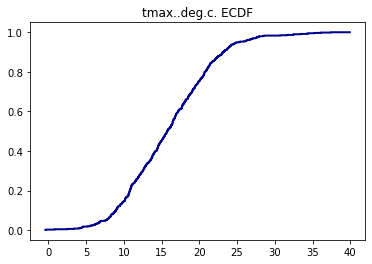

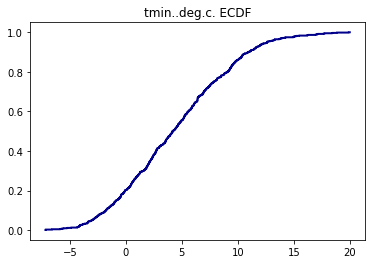

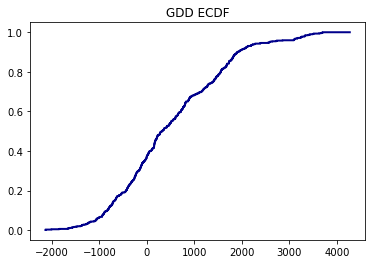

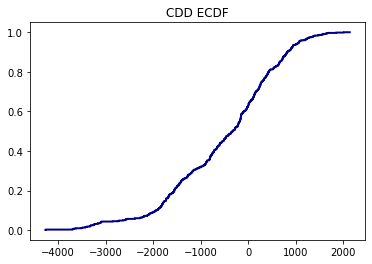

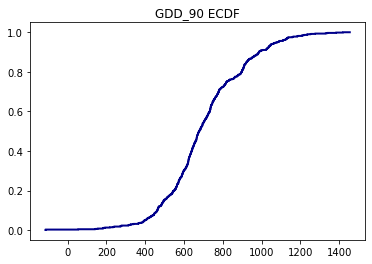

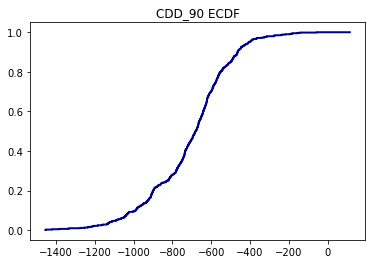

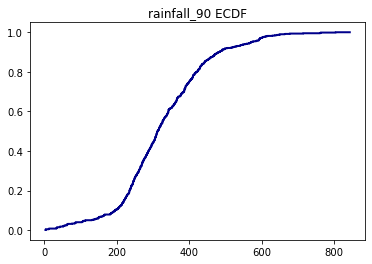

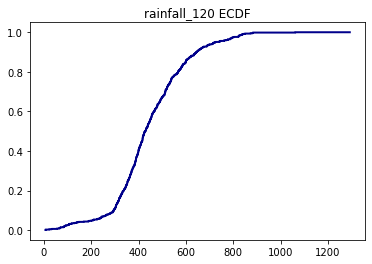

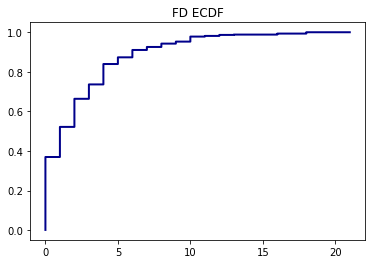

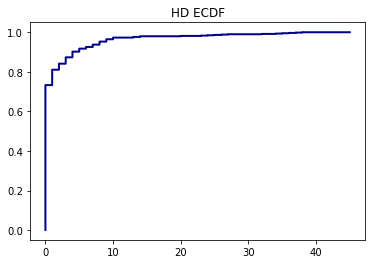

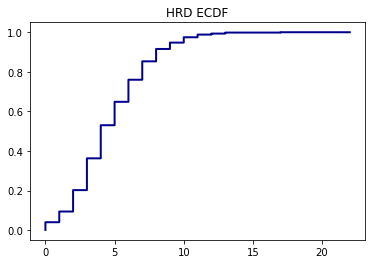

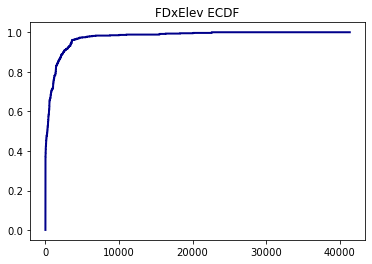

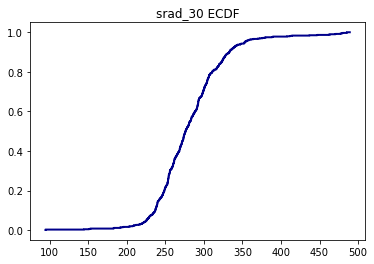

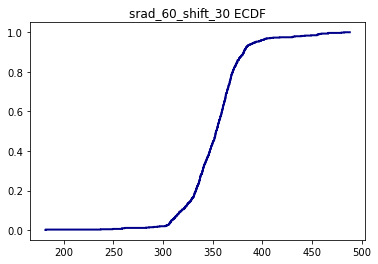

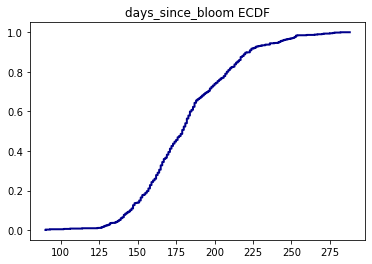

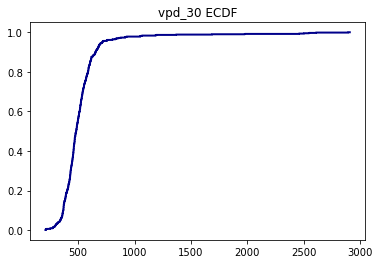

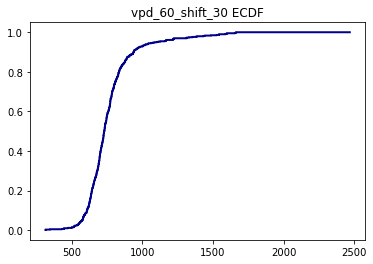

In [29]:
## KDE of temp variables 
from statsmodels.distributions.empirical_distribution import ECDF
from matplotlib import pyplot as plt

cols = ['tmax..deg.c.', 'tmin..deg.c.', 'GDD', 'CDD','GDD_90', 'CDD_90'
                  , 'rainfall_30', 'rainfall_60_shift_30', 'FD', 'HD', 'HRD', 'FDxElev', 'srad_30'
                  , 'srad_60_shift_30', 'days_since_bloom', 'vpd_30', 'vpd_60_shift_30']
for tt in range(len(cols)):
    var = cols[tt]
    # obtain ECDF
    ecdf = ECDF(temp_data[var])
    plt.figure()
    plt.step(ecdf.x, ecdf.y, color = "darkblue", linewidth = 2)
    # plt.plot(v, q, color = "red", )
    plt.title(var + " ECDF")

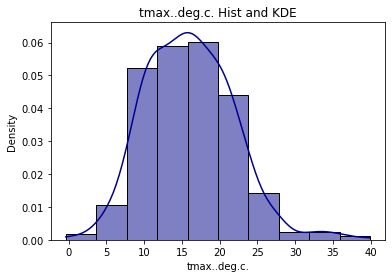

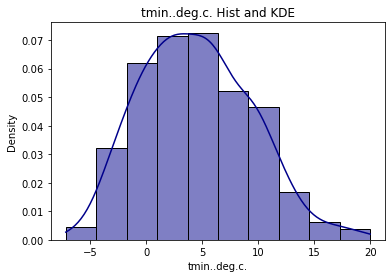

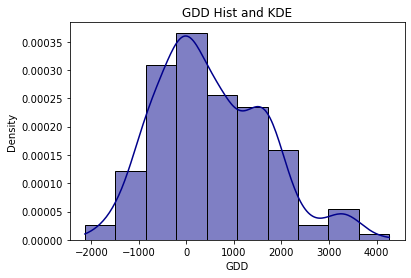

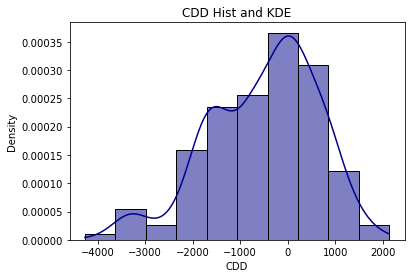

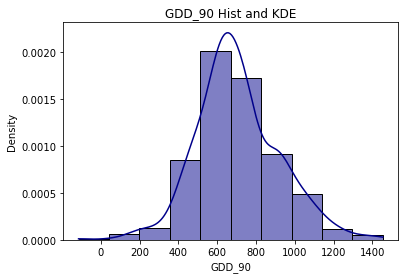

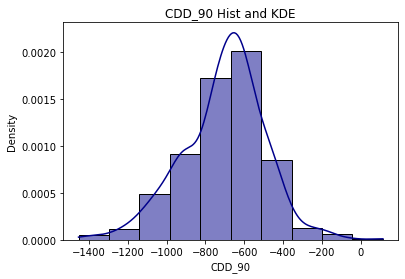

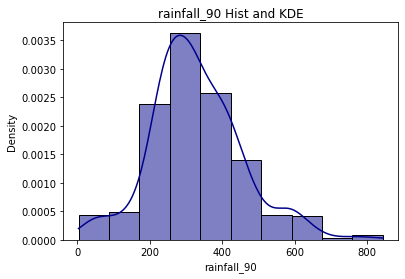

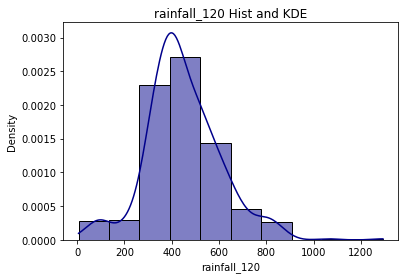

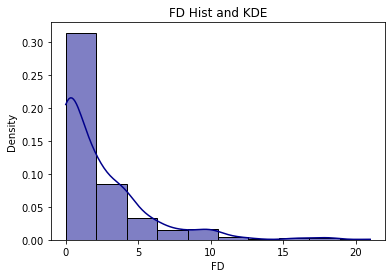

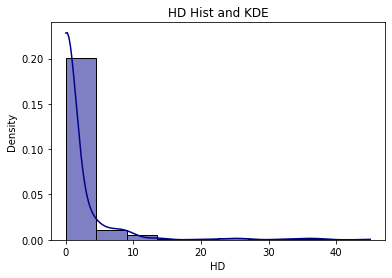

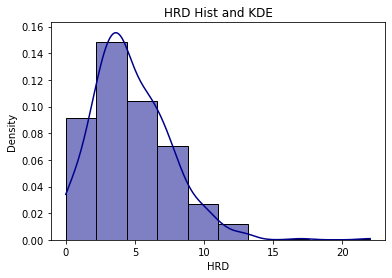

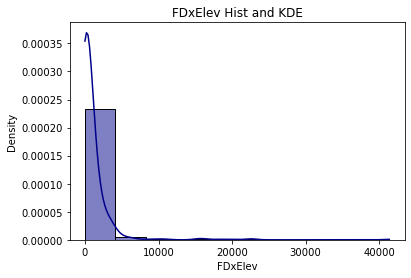

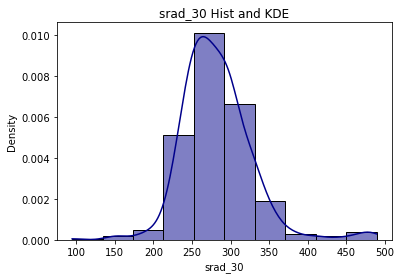

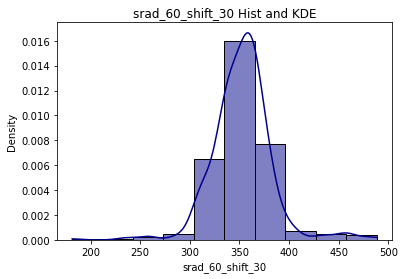

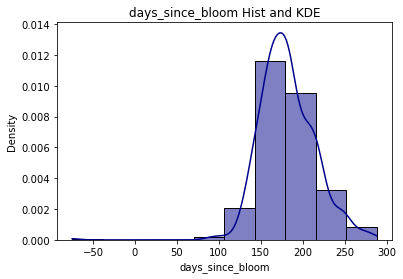

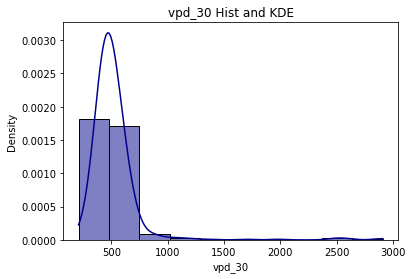

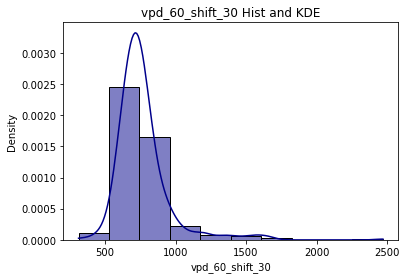

In [395]:
import seaborn as sns

cols = ['tmax..deg.c.', 'tmin..deg.c.', 'GDD', 'CDD','GDD_90', 'CDD_90'
                  , 'rainfall_30', 'rainfall_60_shift_30', 'FD', 'HD', 'HRD', 'FDxElev', 'srad_30'
                  , 'srad_60_shift_30', 'days_since_bloom', 'vpd_30', 'vpd_60_shift_30']

for tt in range(len(cols)):
    var = cols[tt]
    plt.figure()
    sns.histplot(temp_data[var], bins = 10, kde = True, stat = "density", color = 'darkblue')
    plt.title(var + " Hist and KDE")

In [406]:
dataset_analysis.columns

Index(['site', 'roi_id', 'year', 'transition_10_falling',
       'transition_10_rising', 'transition_25_falling', 'transition_25_rising',
       'transition_50_falling', 'transition_50_rising', 'smooth_gcc_90',
       'veg_type', 'lat', 'lon', 'elev', 'solar_elev_min', 'date', 'doy',
       'outlierflag_gcc_90', 'dayl..s.', 'prcp..mm.day.', 'srad..W.m.2.',
       'swe..kg.m.2.', 'tmax..deg.c.', 'tmin..deg.c.', 'vp..Pa.',
       'phenophase_transition_10_rising', 'phenophase_transition_10_25_rising',
       'phenophase_transition_25_50_rising',
       'phenophase_transition_10_25_falling',
       'phenophase_transition_25_50_falling', 'rising_falling', 'n_days',
       'average_rising_start', 'month', 'lat_round10', 'GDD', 'avg_temp',
       'GDD_sum', 'GDD_d', 'GDD_90', 'CDD_d', 'CDD', 'CDD_90', 'rainfall_90',
       'rainfall_120', 'FD', 'HD', 'HRD', 'avg_rainfall', 'semi_arid',
       'FDxElev', 'srad_90', 'srad_60_shift_30', 'srad_30', 'days_since_bloom',
       'HDxrain', 'VPD', 'v

In [45]:
conditions = [
    (dataset_analysis['date'] < dataset_analysis['transition_10_rising']),
   ( dataset_analysis['date'].between(dataset_analysis['transition_10_rising'],
                                      dataset_analysis['transition_50_rising'] )),
    ((dataset_analysis['date'] > dataset_analysis['transition_50_rising']) &
    (dataset_analysis['date'] < dataset_analysis['transition_50_falling']) ),
    ( dataset_analysis['date'].between(dataset_analysis['transition_50_falling']
                                       ,dataset_analysis['transition_10_falling'] )),
    (dataset_analysis['date'] > dataset_analysis['transition_10_falling'])
]
values = ['dormant', 'rising', 'fullgreen', 'falling', 'dormant']
dataset_analysis['phases4'] = np.select(conditions, values)



/var/folders/6d/4h428hj560j7r870zw5g39180000gn/T/ipykernel_998/293391427.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_analysis['phases4'] = np.select(conditions, values)


In [51]:
b, c = np.unique(dataset_analysis['phases4'], return_inverse=True)
print(c)
dataset_analysis['phases4_int'] = c
dataset_analysis['phases4_int']

[0 0 0 ... 0 0 0]


/var/folders/6d/4h428hj560j7r870zw5g39180000gn/T/ipykernel_998/367141966.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_analysis['phases4_int'] = c


221423    0
221424    0
221425    0
221426    0
221427    0
         ..
253247    0
261877    0
267246    0
269928    0
276967    0
Name: phases4_int, Length: 216170, dtype: int64

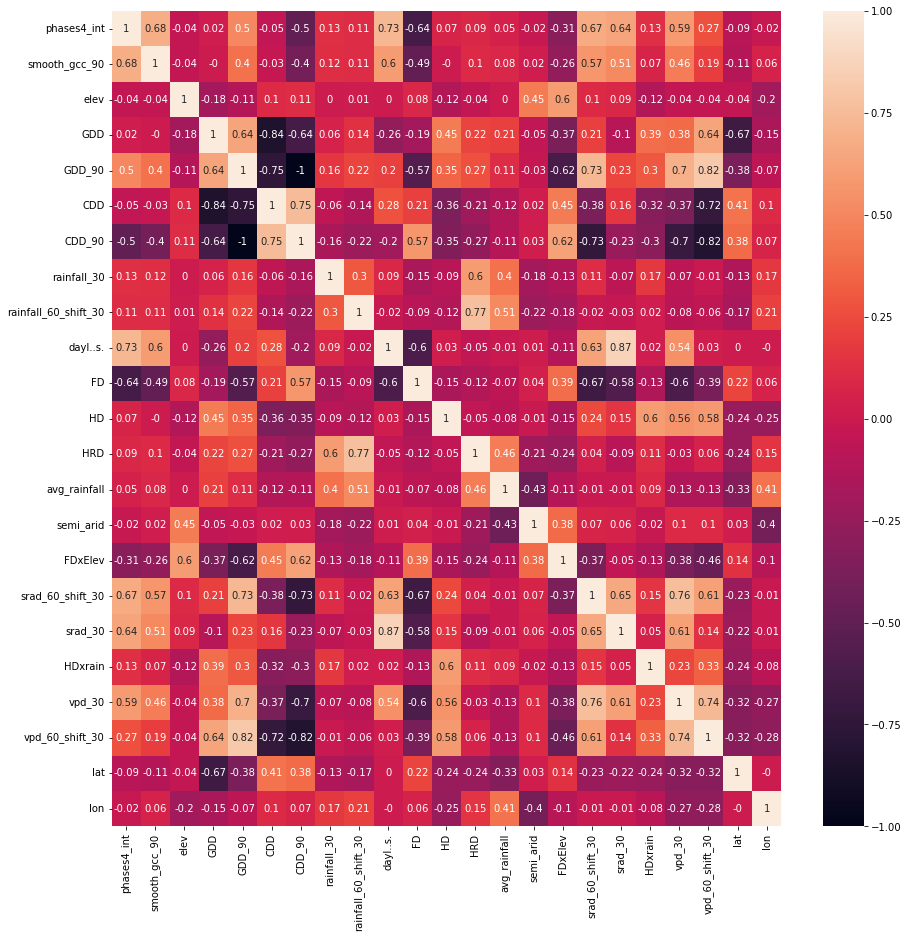

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt


df = dataset_analysis[['phases4_int', 'smooth_gcc_90','elev'
                       , 'GDD', 'GDD_90', 'CDD', 'CDD_90',
                 'rainfall_30', 'rainfall_60_shift_30', 'dayl..s.', 'FD',
         'HD', 'HRD', 'avg_rainfall', 'semi_arid',
       'FDxElev',  'srad_60_shift_30', 'srad_30', 
       'HDxrain', 'vpd_30', 'vpd_60_shift_30', 'lat', 'lon']]

df = df.dropna()
matrix = df.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

In [258]:
pd.DataFrame.to_csv(dataset_analysis,'Documents/PhenoCam_data/full_timeperiod.csv')
# pd.DataFrame.to_csv(temp_data,'Documents/PhenoCam_data/autumn_start_only.csv')

In [259]:
dataset_analysis[(dataset_analysis['site'] == 'acadia') & (dataset_analysis['year']  == 2016)
                 & (dataset_analysis['month']  == 10)][
['site', 'date', 'transition_10_rising', 'transition_50_rising',
                 'transition_10_falling', 'transition_50_falling', 'phases4', 'dayl..s.']]

,site,date,transition_10_rising,transition_50_rising,transition_10_falling,transition_50_falling,phases4,dayl..s.
3576,acadia,2016-10-01,2016-05-09,2016-05-20,2016-10-21,2016-10-07,fullgreen,41028.07
3577,acadia,2016-10-02,2016-05-09,2016-05-20,2016-10-21,2016-10-07,fullgreen,40840.60
3578,acadia,2016-10-03,2016-05-09,2016-05-20,2016-10-21,2016-10-07,fullgreen,40653.50
3579,acadia,2016-10-04,2016-05-09,2016-05-20,2016-10-21,2016-10-07,fullgreen,40466.80
3580,acadia,2016-10-05,2016-05-09,2016-05-20,2016-10-21,2016-10-07,fullgreen,40280.54
3581,acadia,2016-10-06,2016-05-09,2016-05-20,2016-10-21,2016-10-07,fullgreen,40094.74
3582,acadia,2016-10-07,2016-05-09,2016-05-20,2016-10-21,2016-10-07,falling,39909.44
3583,acadia,2016-10-08,2016-05-09,2016-05-20,2016-10-21,2016-10-07,falling,39724.68
3584,acadia,2016-10-09,2016-05-09,2016-05-20,2016-10-21,2016-10-07,falling,39540.49
3585,acadia,2016-10-10,2016-05-09,2016-05-20,2016-10-21,2016-10-07,falling,39356.91


In [257]:
from sklearn.mixture import BayesianGaussianMixture

dataset_analysis = dataset_analysis.loc[dataset_analysis['phases4'] != '0']
df = dataset_analysis[['elev', 'GDD', 'GDD_90', 
                 'CDD', 'CDD_90', 'rainfall_90', 'dayl..s.',
       'rainfall_120', 'FD', 'HD', 'HRD', 'avg_rainfall', 'semi_arid',
       'FDxElev',  'srad_60_shift_30', 'srad_30', 
       'HDxrain', 'vpd_30', 'vpd_60_shift_30', 'lat', 'lon']]

df_y = dataset_analysis[['phases4', 'elev', 'GDD', 'GDD_90', 
                 'CDD', 'CDD_90', 'rainfall_90', 'dayl..s.',
       'rainfall_120', 'FD', 'HD', 'HRD', 'avg_rainfall', 'semi_arid',
       'FDxElev',  'srad_60_shift_30', 'srad_30', 
       'HDxrain', 'vpd_30', 'vpd_60_shift_30', 'lat', 'lon']]


df = df.dropna()
df_y = df_y.dropna()
df_y = df_y[['phases4']]
print(df.count())
print(df_y.count())

elev                207688
GDD                 207688
GDD_90              207688
CDD                 207688
CDD_90              207688
rainfall_90         207688
dayl..s.            207688
rainfall_120        207688
FD                  207688
HD                  207688
HRD                 207688
avg_rainfall        207688
semi_arid           207688
FDxElev             207688
srad_60_shift_30    207688
srad_30             207688
HDxrain             207688
vpd_30              207688
vpd_60_shift_30     207688
lat                 207688
lon                 207688
dtype: int64
phases4    207688
dtype: int64


In [106]:
%matplotlib inline
import pandas as pd # for using pandas daraframe
import numpy as np # for som math operations
from sklearn.preprocessing import StandardScaler # for standardizing the Data
from sklearn.decomposition import PCA # for PCA calculation
import matplotlib.pyplot as plt # for plotting

In [249]:
X = df.values # getting all values as a matrix of dataframe 
y = df_y.values
sc = StandardScaler() # creating a StandardScaler object
X_std = sc.fit_transform(X) # standardizing the data
y

array([['rising'],
       ['rising'],
       ['rising'],
       ...,
       ['dormant'],
       ['dormant'],
       ['dormant']], dtype=object)

In [250]:
import plotly.graph_objects as go
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load and split data

X_train, X_test, y_train, y_test = train_test_split(
    X_std, y.astype(str), test_size=0.25, random_state=0)
y_train = y_train.ravel()
y_test = y_test.ravel()


# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_std)
# X_pca.shape

# X_train, X_test, y_train, y_test = train_test_split(
#     X_pca, y.astype(str), test_size=0.25, random_state=0)
# y_train = y_train.ravel()
# y_test = y_test.ravel()

In [142]:


# trace_specs = [
#     [X_train, y_train, '0', 'Train', 'square'],
#     [X_train, y_train, '1', 'Train', 'circle'],
#     [X_train, y_train, '2', 'Train', 'square'],
#     [X_train, y_train, '3', 'Train', 'circle'],
#     [X_test, y_test, '0', 'Test', 'square-dot'],
#     [X_test, y_test, '1', 'Test', 'circle-dot']
#     [X_test, y_test, '2', 'Test', 'square-dot'],
#     [X_test, y_test, '3', 'Test', 'circle-dot']
# ]

# fig = go.Figure(data=[
#     go.Scatter(
#         x=X[y==label, 0], y=X[y==label, 1],
#         name=f'{split} Split, Label {label}',
#         mode='markers', marker_symbol=marker
#     )
#     for X, y, label, split, marker in trace_specs
# ])
# fig.update_traces(
#     marker_size=12, marker_line_width=1.5,
#     marker_color="lightyellow"
# )

# fig.show()


In [196]:
import plotly.express as px
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load and split data
# X, y = make_moons(noise=0.3, random_state=0)
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y.astype(str), test_size=0.25, random_state=0)

# Fit the model on training data, predict on test data
clf = KNeighborsClassifier(15)
clf.fit(X_train, y_train)
y_score = clf.predict_proba(X_test)[:, 1]
# fig = px.scatter(
#     X_test, x=0, y=1,
#     color=y_score, color_continuous_scale='RdBu',
#     symbol=y_test, symbol_map={'0': 'square-dot', '1': 'circle-dot'},
#     labels={'symbol': 'label', 'color': 'score of <br>first class'}
# )
# fig.update_traces(marker_size=12, marker_line_width=1.5)
# fig.update_layout(legend_orientation='h')
# fig.show()



In [211]:
clf.score(X_train, y_train)

# y_scoredf = pd.DataFrame(y_score)
# y_scoredf['actuals'] = y_test
# y_scoredf.value_counts().unstack()

0.999750220786983

In [208]:
ys = clf.predict(X_test)

In [209]:
y_scoredf = pd.DataFrame(ys)
y_scoredf['actuals'] = y_test
summary2 = y_scoredf.value_counts().unstack()

In [210]:
summary2.apply(lambda x: x/x.sum(), axis=1)

actuals,dormant,falling,fullgreen,rising
0,,,,
dormant,0.977073,0.015256,0.000597,0.007074
falling,0.052902,0.891953,0.055146,NaN
fullgreen,0.000375,0.010534,0.984409,0.004682
rising,0.067474,NaN,0.092561,0.839965


In [174]:
from sklearn import inspection
from sklearn.inspection import DecisionBoundaryDisplay


ImportError: cannot import name 'DecisionBoundaryDisplay' from 'sklearn.inspection' (/opt/anaconda3/lib/python3.9/site-packages/sklearn/inspection/__init__.py)

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.inspection import DecisionBoundaryDisplay

n_neighbors = 15

# import some data to play with
# iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = X_train
y = y_train

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

for weights in ["uniform", "distance"]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=cmap_light,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
    )

    # Plot also the training points
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=iris.target_names[y],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
    plt.title(
        "3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
    )

plt.show()

ImportError: cannot import name 'DecisionBoundaryDisplay' from 'sklearn.inspection' (/opt/anaconda3/lib/python3.9/site-packages/sklearn/inspection/__init__.py)

In [251]:
#### decision trees
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
ys = clf.predict(X_test)

[Text(0.37757411883331987, 0.9838709677419355, 'X[6] <= 39251.664\ngini = 0.564\nsamples = 112099\nvalue = [35269, 9148, 64360, 3322]'),
 Text(0.1439189615295962, 0.9516129032258065, 'X[6] <= 36839.615\ngini = 0.247\nsamples = 36833\nvalue = [31666, 4245, 905, 17]'),
 Text(0.053828081588354636, 0.9193548387096774, 'X[6] <= 35932.715\ngini = 0.066\nsamples = 29208\nvalue = [28221, 881, 89, 17]'),
 Text(0.019386929154146762, 0.8870967741935484, 'X[8] <= 5.5\ngini = 0.029\nsamples = 25795\nvalue = [25422, 324, 32, 17]'),
 Text(0.007442972347981568, 0.8548387096774194, 'X[11] <= 640.777\ngini = 0.158\nsamples = 2657\nvalue = [2428, 216, 13, 0]'),
 Text(0.0013325646794882639, 0.8225806451612904, 'X[4] <= -1489.638\ngini = 0.394\nsamples = 79\nvalue = [9, 60, 10, 0]'),
 Text(0.0006662823397441319, 0.7903225806451613, 'X[3] <= -5115.583\ngini = 0.32\nsamples = 10\nvalue = [0, 2, 8, 0]'),
 Text(0.00033314116987206597, 0.7580645161290323, 'gini = 0.0\nsamples = 8\nvalue = [0, 0, 8, 0]'),
 Text(

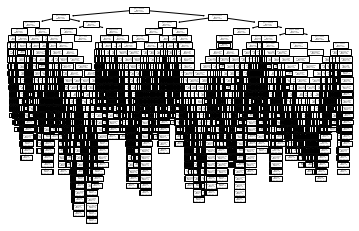

In [203]:
tree.plot_tree(clf)

In [252]:
y_scoredf = pd.DataFrame(ys)
y_scoredf['actuals'] = y_test
summary = y_scoredf.value_counts().unstack()

summary

actuals,dormant,falling,fullgreen,rising
0,,,,
dormant,25428.0,186.0,14.0,131.0
falling,186.0,2690.0,186.0,NaN
fullgreen,14.0,183.0,21726.0,143.0
rising,144.0,NaN,139.0,1539.0


In [253]:
summary.apply(lambda x: x/x.sum(), axis=1)

actuals,dormant,falling,fullgreen,rising
0,,,,
dormant,0.987150,0.007221,0.000543,0.005086
falling,0.060745,0.878511,0.060745,NaN
fullgreen,0.000634,0.008293,0.984592,0.006481
rising,0.079034,NaN,0.076290,0.844676


In [205]:
summary.apply(lambda x: x/x.sum(), axis=1)

actuals,dormant,falling,fullgreen,rising
0,,,,
dormant,0.977073,0.015256,0.000597,0.007074
falling,0.052902,0.891953,0.055146,NaN
fullgreen,0.000375,0.010534,0.984409,0.004682
rising,0.067474,NaN,0.092561,0.839965


In [221]:
clf = tree.DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities


Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

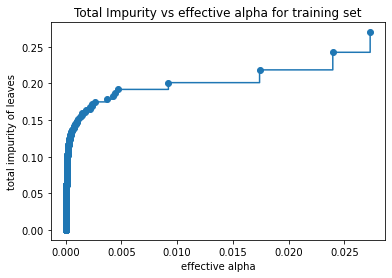

In [214]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [225]:
print(ccp_alphas[ccp_alphas > 0].size)
print(ccp_alphas.size)

1961
1970


In [226]:
ccp_alphas = ccp_alphas[ccp_alphas > 0]
print(ccp_alphas)

clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)



[6.77626358e-21 1.98237471e-06 2.97356206e-06 ... 2.39681866e-02
 2.73220034e-02 2.94176910e-01]


KeyboardInterrupt: 

In [229]:
len(clfs)

1474

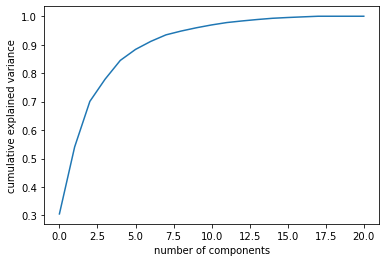

In [417]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [429]:
num_components = 20
pca = PCA(num_components)  
X_pca = pca.fit_transform(X_std) # fit and reduce dimension

In [443]:
pca = PCA(n_components = .99)
X_pca = pca.fit_transform(X_std) # this will fit and reduce dimensions
print(pca.n_components_) # one can print and see how many components are selected. 
#In this case it is 4 same as above we saw in step 5

15


In [441]:
pd.DataFrame(pca.components_, columns = df.columns)

,elev,GDD_sum,GDD_90,CDD,CDD_90,rainfall_90,dayl..s.,rainfall_120,FD,HD,...,avg_rainfall,semi_arid,FDxElev,srad_90,srad_60_shift_30,srad_30,days_since_bloom,HDxrain,vpd_30,vpd_60_shift_30
0,-9.105334e-02,0.295097,0.371933,-0.295097,-0.371933,3.630622e-02,4.270582e-02,4.764761e-02,-3.297597e-01,2.310687e-01,...,5.640030e-02,-3.460465e-02,-2.460712e-01,0.173796,0.200201,0.117625,6.798539e-02,2.009030e-01,2.775725e-01,3.125366e-01
1,9.467457e-02,-0.187783,-0.040154,0.187783,0.040154,-1.948203e-01,3.691753e-01,-2.097941e-01,5.836722e-02,2.921707e-02,...,-1.685231e-01,1.322884e-01,9.659598e-02,0.375389,0.337136,0.377683,-3.629450e-01,-5.381518e-02,2.561765e-01,6.546435e-03
2,-1.030325e-02,-0.113059,0.025592,0.113059,-0.025592,4.389035e-01,2.470943e-01,4.281019e-01,-5.834314e-02,-1.899353e-01,...,3.391970e-01,-2.196930e-01,-1.048136e-01,0.138481,0.097684,0.173947,-2.541699e-01,-3.869029e-02,-6.789457e-02,-2.344539e-01
3,6.257246e-01,0.093571,0.021960,-0.093571,-0.021960,1.870951e-01,-9.260366e-02,1.826463e-01,5.116094e-02,5.878484e-02,...,4.096287e-02,4.950023e-01,4.334534e-01,0.050538,0.069566,0.019481,7.318446e-02,1.134121e-01,1.368025e-02,9.268523e-02
4,-1.904898e-01,0.102754,-0.176118,-0.102754,0.176118,2.514803e-02,8.719362e-02,1.379152e-02,3.619538e-01,5.083935e-01,...,1.619131e-01,-1.721228e-01,2.050008e-01,-0.011479,-0.097490,0.101554,-1.003796e-01,5.851828e-01,4.615996e-02,-9.807169e-02
5,-1.720627e-01,-0.354453,0.052505,0.354453,-0.052505,2.301574e-01,1.719628e-02,1.253718e-01,-9.041045e-02,2.122501e-01,...,-5.787165e-01,2.082530e-01,-1.267205e-01,-0.119515,-0.093727,-0.137900,-4.021223e-02,2.245678e-01,8.319128e-02,1.294719e-01
6,-4.527974e-01,0.338886,-0.032915,-0.338886,0.032915,4.499074e-02,1.427907e-01,6.167488e-03,9.699865e-02,-3.009606e-01,...,-1.992931e-01,5.287521e-01,-1.767435e-03,-0.007705,-0.124848,0.145241,-1.519630e-01,-4.507593e-03,-5.816788e-02,-2.097551e-01
7,-8.522903e-02,0.146515,-0.201229,-0.146515,0.201229,1.051290e-01,-7.421209e-02,2.493417e-02,2.562906e-01,1.802869e-01,...,-1.703327e-01,-2.186041e-01,1.026057e-01,0.041795,0.010183,0.077536,5.477296e-02,-5.559899e-01,3.385244e-01,3.006149e-01
8,4.785099e-02,0.124855,0.138589,-0.124855,-0.138589,9.889135e-03,-1.904499e-02,-3.120849e-02,1.159342e-04,-2.925590e-01,...,-5.171218e-01,-4.999322e-01,4.134397e-01,0.111107,0.140074,0.059518,3.254202e-02,1.915001e-01,-2.607232e-01,-5.776911e-02
9,4.621968e-02,-0.004193,0.229554,0.004193,-0.229554,8.868265e-02,2.293508e-01,1.497310e-01,-1.029477e-01,6.198027e-02,...,-4.558775e-02,-1.075761e-01,3.243207e-01,-0.269155,-0.547001,0.125242,-8.363274e-02,-1.847299e-01,3.619734e-01,-1.583214e-01


In [442]:
n_pcs= pca.n_components_ # get number of component# get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = df.columns
# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
most_important_names

['GDD_90',
 'srad_30',
 'rainfall_90',
 'elev',
 'HDxrain',
 'avg_rainfall',
 'semi_arid',
 'HDxrain',
 'avg_rainfall',
 'srad_60_shift_30',
 'FDxElev',
 'HRD',
 'vpd_60_shift_30',
 'HD',
 'dayl..s.',
 'days_since_bloom',
 'rainfall_90',
 'FD',
 'srad_90',
 'GDD_sum',
 'GDD_90']

In [437]:
df.columns
[np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

range(n_pcs)

range(0, 15)

In [481]:
## gaussian mixture model
X = df.values # getting all values as a matrix of dataframe 

X.shape
sc = StandardScaler() # creating a StandardScaler object
X_std = sc.fit_transform(X) # standardizing the data


In [482]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=4, random_state=42)

tt = bgm.fit_predict(X_std)

In [483]:
pdtt = pd.DataFrame(tt, columns=['grouping'])
pdtt['phases4'] = df_y['phases4']
summary = pdtt[['grouping', 'phases4']].value_counts().unstack()
summary

phases4,0,dormant,falling,fullgreen,rising
grouping,,,,,
0,1335,6644,1816,13301,609
1,1413,8583,1944,14355,944
2,1434,8072,1793,15336,962
3,863,3045,1028,5340,282


In [484]:
summary.apply(lambda x: x/x.sum(), axis=1)

phases4,0,dormant,falling,fullgreen,rising
grouping,,,,,
0,0.056317,0.280278,0.076608,0.561105,0.025691
1,0.051874,0.315100,0.071368,0.527002,0.034656
2,0.051962,0.292496,0.064971,0.555713,0.034859
3,0.081739,0.288407,0.097367,0.505778,0.026710


In [53]:
dataset_analysis.columns

Index(['Unnamed: 0', 'site', 'roi_id', 'year', 'transition_10_falling',
       'transition_10_rising', 'transition_25_falling', 'transition_25_rising',
       'transition_50_falling', 'transition_50_rising',
       ...
       'srad_30', 'srad_60_shift_30', 'days_since_bloom', 'avg_rainfall',
       'semi_arid', 'VPD', 'vpd_30', 'vpd_60_shift_30', 'phases4',
       'phases4_int'],
      dtype='object', length=102)

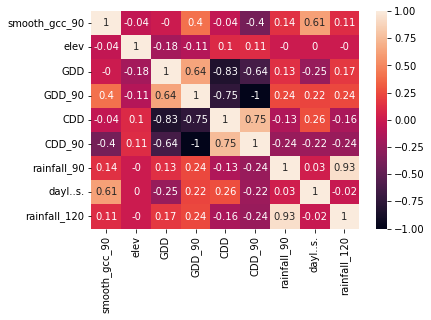

In [256]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = dataset_analysis[['smooth_gcc_90','elev', 'GDD', 'GDD_90', 
                 'CDD', 'CDD_90', 'rainfall_90', 'dayl..s.',
       'rainfall_120']]
df = df.dropna()
matrix = df.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()


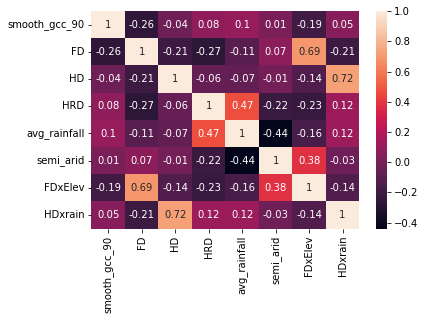

In [495]:

df = dataset_analysis[['smooth_gcc_90', 'FD', 'HD', 'HRD', 'avg_rainfall', 'semi_arid',
       'FDxElev', 'HDxrain']]
df = df.dropna()
matrix = df.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()


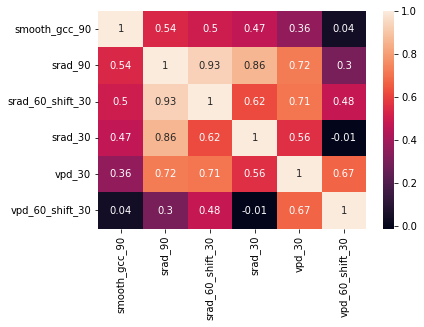

In [496]:

df = dataset_analysis[['smooth_gcc_90','srad_90', 'srad_60_shift_30', 'srad_30', 
       'vpd_30', 'vpd_60_shift_30']]
df = df.dropna()
matrix = df.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()


In [497]:
temp_data.columns

Index(['site', 'roi_id', 'year', 'transition_10_falling',
       'transition_10_rising', 'transition_25_falling', 'transition_25_rising',
       'transition_50_falling', 'transition_50_rising', 'smooth_gcc_90',
       'veg_type', 'lat', 'lon', 'elev', 'solar_elev_min', 'date', 'doy',
       'outlierflag_gcc_90', 'dayl..s.', 'prcp..mm.day.', 'srad..W.m.2.',
       'swe..kg.m.2.', 'tmax..deg.c.', 'tmin..deg.c.', 'vp..Pa.',
       'phenophase_transition_10_rising', 'phenophase_transition_10_25_rising',
       'phenophase_transition_25_50_rising',
       'phenophase_transition_10_25_falling',
       'phenophase_transition_25_50_falling', 'rising_falling', 'n_days',
       'average_rising_start', 'month', 'lat_round10', 'GDD', 'avg_temp',
       'GDD_sum', 'GDD_d', 'GDD_90', 'CDD_d', 'CDD', 'CDD_90', 'rainfall_90',
       'rainfall_120', 'FD', 'HD', 'HRD', 'avg_rainfall', 'semi_arid',
       'FDxElev', 'srad_90', 'srad_60_shift_30', 'srad_30', 'days_since_bloom',
       'HDxrain', 'VPD', 'v

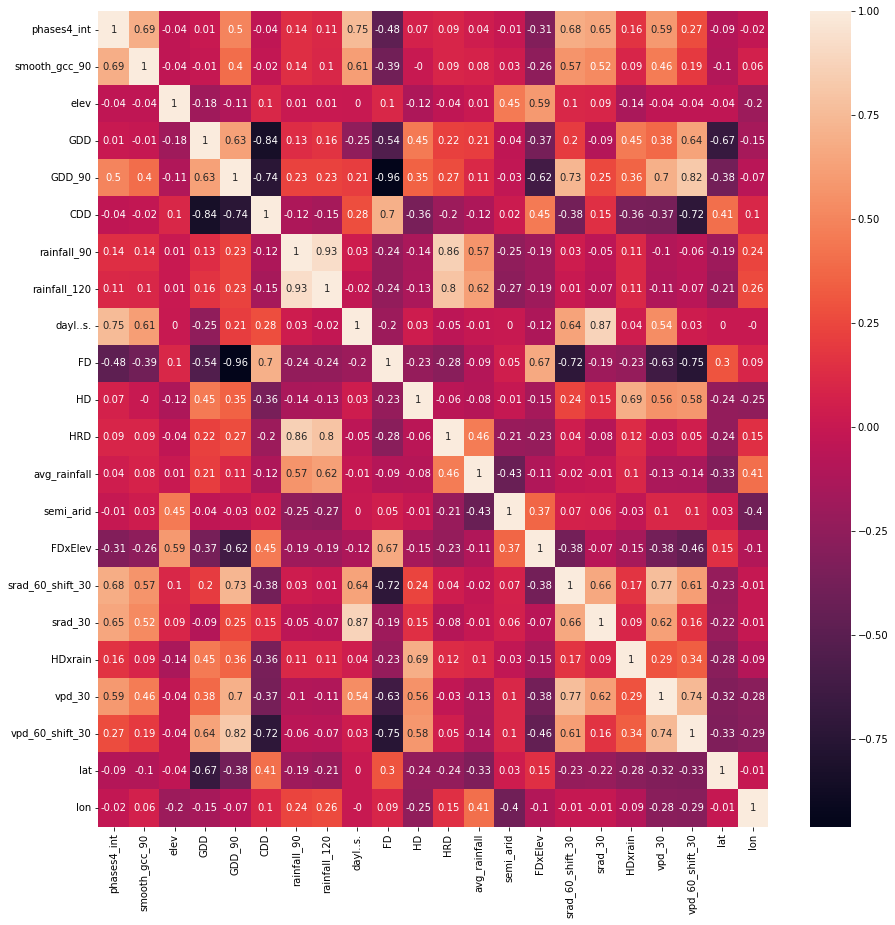

doy             592
elev            592
GDD             592
GDD_90          592
CDD             592
CDD_90          592
rainfall_90     592
dayl..s.        592
rainfall_120    592
dtype: int64


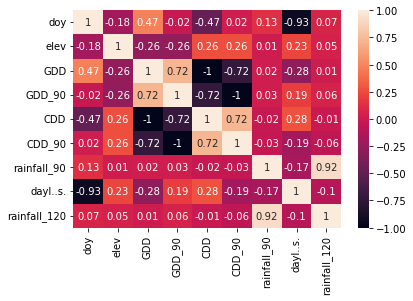

In [101]:
df = temp_data[['doy','elev', 'GDD', 'GDD_90', 
                 'CDD', 'CDD_90', 'rainfall_90', 'dayl..s.',
       'rainfall_120']]
df = df.dropna()
print(df.count())
matrix = df.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()


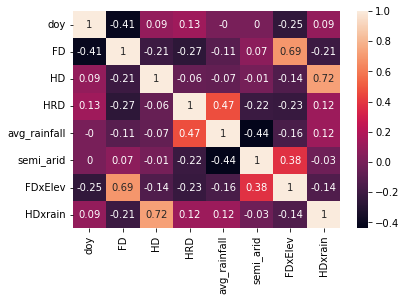

In [499]:
df = dataset_analysis[['doy', 'FD', 'HD', 'HRD', 'avg_rainfall', 'semi_arid',
       'FDxElev', 'HDxrain']]
df = df.dropna()
matrix = df.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()


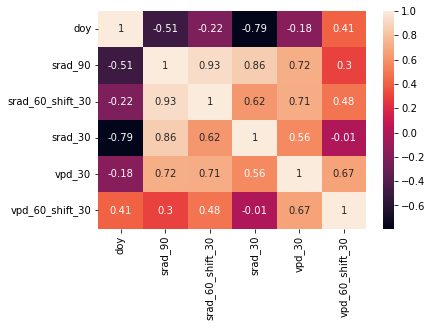

In [500]:
df = dataset_analysis[['doy','srad_90', 'srad_60_shift_30', 'srad_30', 
       'vpd_30', 'vpd_60_shift_30']]
df = df.dropna()
matrix = df.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()


In [52]:
##### MAKE PLOT STARTS HERE!!!!!!!

chart_data_rising = dataset_analysis.loc[dataset_analysis['transition_10_rising'] == dataset_analysis['date']]
# chart_data_rising = chart_data_rising.groupby(
#     ['site', 'lat', 'lon'])['doy'].mean().rename_axis(
#     ['site', 'lat', 'lon']).reset_index(name='average_rising_start')

chart_data_rising['lat_round'] = chart_data_rising['lat'].round(0)
chart_data_rising['lat_round10'] = chart_data_rising['lat'].round(-1)

dataset_analysis['lat_round10'] = dataset_analysis['lat'].round(-1)

dataset_analysis.loc[dataset_analysis['transition_10_rising'] == dataset_analysis['date']].groupby(
    ['lat_round10'])['doy','tmax..deg.c.', 'tmin..deg.c.' ].mean()
# dataset_analysis.groupby(
#     ['lat_round10']).count()

/var/folders/6d/4h428hj560j7r870zw5g39180000gn/T/ipykernel_1033/429178506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chart_data_rising['lat_round'] = chart_data_rising['lat'].round(0)
/var/folders/6d/4h428hj560j7r870zw5g39180000gn/T/ipykernel_1033/429178506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chart_data_rising['lat_round10'] = chart_data_rising['lat'].round(-1)
/var/folders/6d/4h428hj560j7r870zw5g39180000gn/T/ipykernel_1033/429178506.py:11: SettingWithCopyWarning: 
A value is trying

,doy,tmax..deg.c.,tmin..deg.c.
lat_round10,,,
20.0,169.000000,26.425000,16.835000
30.0,76.636364,21.849394,8.501515
40.0,112.711900,17.535386,4.963737
50.0,128.573034,15.947303,1.899213
60.0,79.166667,0.778333,-6.790000


In [53]:
chart_data_rising = chart_data_rising.groupby(
    ['site', 'lat', 'lon'])['doy'].mean().rename_axis(
    ['site', 'lat', 'lon']).reset_index(name='average_rising_start')
chart_data_rising

,site,lat,lon,average_rising_start
0,NEON.D01.BART.DP1.00033,44.063869,-71.287375,128.200000
1,NEON.D01.HARV.DP1.00033,42.536911,-72.172650,130.400000
2,NEON.D02.BLAN.DP1.00033,39.033698,-78.041788,91.400000
3,NEON.D02.SCBI.DP1.00033,38.892925,-78.139494,92.800000
4,NEON.D02.SERC.DP1.00033,38.890080,-76.560010,88.166667
...,...,...,...,...
117,willowcreek,45.805986,-90.079120,130.900000
118,witnesstree,42.535562,-72.189570,129.571429
119,woodshole,41.549500,-70.643200,123.777778
120,woodstockvt,43.613153,-72.544490,126.000000


In [54]:
chart_data_falling = dataset_analysis.loc[dataset_analysis['transition_50_falling'] == dataset_analysis['date']]

chart_data_falling['lat_round'] = chart_data_falling['lat'].round(0)
chart_data_falling['lat_round10'] = chart_data_falling['lat'].round(-1)

chart_data_falling = chart_data_falling.groupby(
    ['site', 'lat', 'lon'])['doy'].mean().rename_axis(
    ['site', 'lat', 'lon']).reset_index(name='average_falling_start')
chart_data_falling

/var/folders/6d/4h428hj560j7r870zw5g39180000gn/T/ipykernel_1033/2521633458.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chart_data_falling['lat_round'] = chart_data_falling['lat'].round(0)
/var/folders/6d/4h428hj560j7r870zw5g39180000gn/T/ipykernel_1033/2521633458.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chart_data_falling['lat_round10'] = chart_data_falling['lat'].round(-1)


,site,lat,lon,average_falling_start
0,NEON.D01.BART.DP1.00033,44.063869,-71.287375,264.800000
1,NEON.D01.HARV.DP1.00033,42.536911,-72.172650,291.400000
2,NEON.D02.BLAN.DP1.00033,39.033698,-78.041788,285.000000
3,NEON.D02.SCBI.DP1.00033,38.892925,-78.139494,294.600000
4,NEON.D02.SERC.DP1.00033,38.890080,-76.560010,293.833333
...,...,...,...,...
121,willamettepoplar,44.136800,-123.182300,240.333333
122,willowcreek,45.805986,-90.079120,257.100000
123,witnesstree,42.535562,-72.189570,284.571429
124,woodshole,41.549500,-70.643200,283.250000


In [55]:
from shapely.geometry import Point
from geopandas import GeoDataFrame

chart_data_rising["coords"] = chart_data_rising[["lon", "lat"]].apply(Point, axis=1)

# chart_data_rising['coords'] = gpd.GeoSeries.from_wkt(chart_data_rising['coords'])
chart_data_rising['coords']

# chart_data_rising["coords"] = chart_data_rising.apply(lambda x: Point(x["Geolocation"][0], x["Geolocation"][1]) , axis = 1)
gdf = GeoDataFrame(chart_data_rising, geometry='coords', crs={'init': 'epsg:4326'})


gdf

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,site,lat,lon,average_rising_start,coords
0,NEON.D01.BART.DP1.00033,44.063869,-71.287375,128.200000,POINT (-71.28737 44.06387)
1,NEON.D01.HARV.DP1.00033,42.536911,-72.172650,130.400000,POINT (-72.17265 42.53691)
2,NEON.D02.BLAN.DP1.00033,39.033698,-78.041788,91.400000,POINT (-78.04179 39.03370)
3,NEON.D02.SCBI.DP1.00033,38.892925,-78.139494,92.800000,POINT (-78.13949 38.89292)
4,NEON.D02.SERC.DP1.00033,38.890080,-76.560010,88.166667,POINT (-76.56001 38.89008)
...,...,...,...,...,...
117,willowcreek,45.805986,-90.079120,130.900000,POINT (-90.07912 45.80599)
118,witnesstree,42.535562,-72.189570,129.571429,POINT (-72.18957 42.53556)
119,woodshole,41.549500,-70.643200,123.777778,POINT (-70.64320 41.54950)
120,woodstockvt,43.613153,-72.544490,126.000000,POINT (-72.54449 43.61315)


In [56]:
chart_data_falling["coords"] = chart_data_falling[["lon", "lat"]].apply(Point, axis=1)

gdf_fall = GeoDataFrame(chart_data_falling, geometry='coords', crs={'init': 'epsg:4326'})

gdf_fall

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,site,lat,lon,average_falling_start,coords
0,NEON.D01.BART.DP1.00033,44.063869,-71.287375,264.800000,POINT (-71.28737 44.06387)
1,NEON.D01.HARV.DP1.00033,42.536911,-72.172650,291.400000,POINT (-72.17265 42.53691)
2,NEON.D02.BLAN.DP1.00033,39.033698,-78.041788,285.000000,POINT (-78.04179 39.03370)
3,NEON.D02.SCBI.DP1.00033,38.892925,-78.139494,294.600000,POINT (-78.13949 38.89292)
4,NEON.D02.SERC.DP1.00033,38.890080,-76.560010,293.833333,POINT (-76.56001 38.89008)
...,...,...,...,...,...
121,willamettepoplar,44.136800,-123.182300,240.333333,POINT (-123.18230 44.13680)
122,willowcreek,45.805986,-90.079120,257.100000,POINT (-90.07912 45.80599)
123,witnesstree,42.535562,-72.189570,284.571429,POINT (-72.18957 42.53556)
124,woodshole,41.549500,-70.643200,283.250000,POINT (-70.64320 41.54950)


In [57]:
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [58]:
x, y = world.loc["ALB", "geometry"].exterior.coords.xy
print('Points in the exterior of Albania:', len(x))

Points in the exterior of Albania: 24


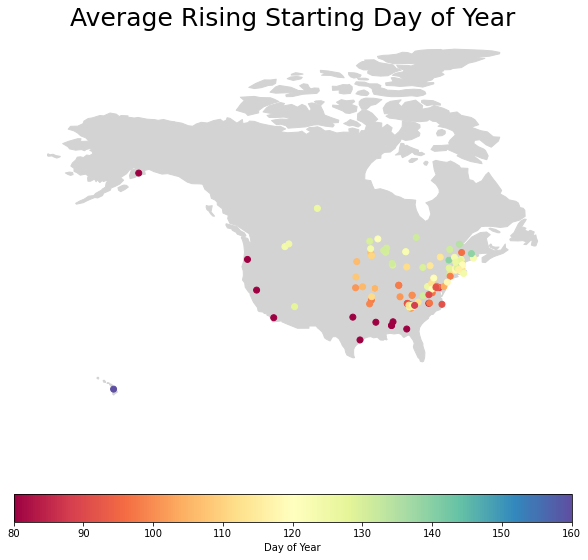

In [99]:
fig, gax = plt.subplots(figsize=(10,10))

# By changing query to "iso_a3 == 'USA' | iso_a3 == 'USA' " can involve Canada
world.query("iso_a3 == 'USA'| iso_a3 == 'CAN'").plot(ax=gax, edgecolor='lightgrey',color='lightgrey')


gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gdf.plot(ax=gax, alpha = 1, column='average_rising_start', legend=True, 
         cmap='Spectral',
         vmin=80, vmax=160,
              legend_kwds={'label': "Day of Year",
                        'orientation': "horizontal"})
# color='red', 

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)
plt.axis('off')
plt.xlabel('Day of Year')
# plt.bar(shrink=0.7)
plt.title('Average Rising Starting Day of Year', fontdict = {'fontsize' : 25})

plt.show()

In [100]:
dataset_analysis['site'].nunique()

129

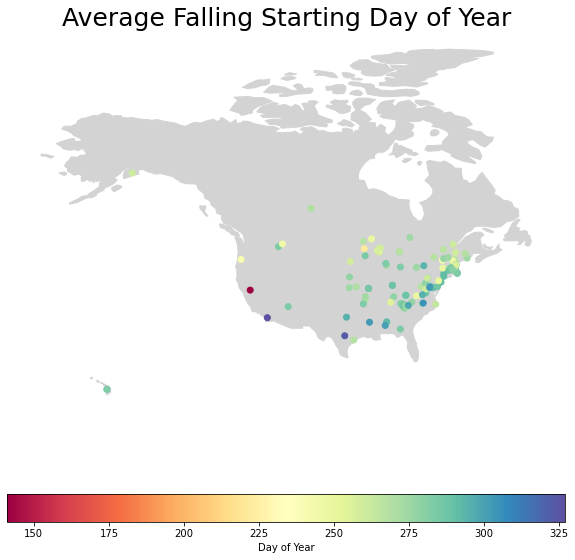

In [94]:
fig, gax = plt.subplots(figsize=(10,10))

world.query("iso_a3 == 'USA'| iso_a3 == 'CAN'").plot(ax=gax, edgecolor='lightgrey',color='lightgrey')

# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.1)

# world.plot(column='pop_est', ax=ax, legend=True, cax=cax)
# world.plot(column='pop_est',

#            ax=ax,

#            legend=True,

#            legend_kwds={'label': "Population by Country",

#                         'orientation': "horizontal"})


gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gdf_fall.plot(ax=gax, alpha = 1, column='average_falling_start', legend=True, 
         cmap='Spectral',
              legend_kwds={'label': "Day of Year",

                        'orientation': "horizontal"})
# color='red', 
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)
plt.axis('off')
plt.title('Average Falling Starting Day of Year', fontdict = {'fontsize' : 25})

plt.show()